# Setup

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sqlalchemy as sa

# Data importation

In [ ]:
con = sa.create_engine('sqlite:///DatosCaso1/airbnb.db')

## Tables from DDBB

In [ ]:
insp = sa.inspect(con)
tables = insp.get_table_names()
print(tables)

['df', 'df_preparado', 'listings', 'listings_det', 'listings_detail']


In [ ]:
listings = pd.read_sql('listings', con)
listings_det = pd.read_sql('listings_det', con)

In [ ]:
# Another way to see the tables in the database:
for each in tables:
    print (each + ": " + str(eval(each + ".shape")))

NameError: name 'df' is not defined

# Web scraping

Data downloaded from website Idealista: https://www.idealista.com/sala-de-prensa/informes-precio-vivienda/venta/madrid-comunidad/madrid-provincia/madrid/

We do that with the plugin instant data scraper in Chrome.

In [9]:
price_m2 = pd.read_csv('DatosCaso1/idealista copy.csv') \
    .loc[1:,['table__cell 2','icon-elbow']] \
    .rename(columns = {'table__cell 2':'precio_m2','icon-elbow':'distrito'})

price_m2.head()

,precio_m2,distrito
1,5.247 €/m2,Arganzuela
2,3.817 €/m2,Barajas
3,2.904 €/m2,Carabanchel
4,6.739 €/m2,Centro
5,6.642 €/m2,Chamartín


In [10]:
price_m2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 1 to 21
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   precio_m2  21 non-null     object
 1   distrito   21 non-null     object
dtypes: object(2)
memory usage: 468.0+ bytes


Transform variable precio_m2 to int:

In [11]:
price_m2['precio_m2'] = price_m2['precio_m2'].str.split(expand = True)[0].str.replace('.','').astype(int)
price_m2

,precio_m2,distrito
1,5247,Arganzuela
2,3817,Barajas
3,2904,Carabanchel
4,6739,Centro
5,6642,Chamartín
6,7394,Chamberí
7,4001,Ciudad Lineal
8,4351,Fuencarral
9,4564,Hortaleza
10,3116,Latina


In [12]:
price_m2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 1 to 21
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   precio_m2  21 non-null     int64 
 1   distrito   21 non-null     object
dtypes: int64(1), object(1)
memory usage: 468.0+ bytes


# Data quality

## Table listings

In [13]:
listings.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,21853,Bright and airy room,83531,Abdel,Latina,Cármenes,40.40381,-3.74130,Private room,31.0,4,33,2018-07-15,0.27,2,144,0,None
1,30320,Great Vacational Apartments,130907,Dana,Centro,Sol,40.41476,-3.70418,Entire home/apt,NaN,5,172,2022-09-26,0.98,3,0,0,None
2,30959,Beautiful loft in Madrid Center,132883,Angela,Centro,Embajadores,40.41259,-3.70105,Entire home/apt,NaN,3,8,2017-05-30,0.07,1,0,0,None
3,40916,Holiday Apartment Madrid Center,130907,Dana,Centro,Universidad,40.42247,-3.70577,Entire home/apt,NaN,5,49,2021-12-11,0.29,3,0,0,None
4,62423,MAGIC ARTISTIC HOUSE IN THE CENTER OF MADRID,303845,Arturo,Centro,Justicia,40.41884,-3.69655,Private room,69.0,1,219,2024-11-24,2.73,3,332,44,None


In [14]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26760 entries, 0 to 26759
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              26760 non-null  int64  
 1   name                            26760 non-null  object 
 2   host_id                         26760 non-null  int64  
 3   host_name                       26757 non-null  object 
 4   neighbourhood_group             26760 non-null  object 
 5   neighbourhood                   26760 non-null  object 
 6   latitude                        26760 non-null  float64
 7   longitude                       26760 non-null  float64
 8   room_type                       26760 non-null  object 
 9   price                           20815 non-null  float64
 10  minimum_nights                  26760 non-null  int64  
 11  number_of_reviews               26760 non-null  int64  
 12  last_review                     

In [15]:
to_delete = ['host_name','number_of_reviews','last_review','reviews_per_month','number_of_reviews_ltm','license']
listings = listings.drop(columns = to_delete)
listings

,id,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,calculated_host_listings_count,availability_365
0,21853,Bright and airy room,83531,Latina,Cármenes,40.403810,-3.741300,Private room,31.0,4,2,144
1,30320,Great Vacational Apartments,130907,Centro,Sol,40.414760,-3.704180,Entire home/apt,NaN,5,3,0
2,30959,Beautiful loft in Madrid Center,132883,Centro,Embajadores,40.412590,-3.701050,Entire home/apt,NaN,3,1,0
3,40916,Holiday Apartment Madrid Center,130907,Centro,Universidad,40.422470,-3.705770,Entire home/apt,NaN,5,3,0
4,62423,MAGIC ARTISTIC HOUSE IN THE CENTER OF MADRID,303845,Centro,Justicia,40.418840,-3.696550,Private room,69.0,1,3,332
...,...,...,...,...,...,...,...,...,...,...,...,...
26755,1308816654087147793,Vive Madrid Río con Confort y Estilo,251333188,Latina,Puerta del Angel,40.413716,-3.724050,Entire home/apt,258.0,1,19,350
26756,1308818613904246041,Alquilo habitación por 15 días.,118339834,Centro,Palacio,40.413342,-3.709019,Private room,20.0,15,1,364
26757,1308839477505592914,Sierra Habitacion doble con Baño Privado,23441165,Puente de Vallecas,Numancia,40.399153,-3.663212,Private room,69.0,1,26,309
26758,1308842708819314249,Estudio luminoso y renovado junto a Madrid Río,251333188,Latina,Puerta del Angel,40.412371,-3.724235,Entire home/apt,258.0,1,19,348


In [16]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26760 entries, 0 to 26759
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              26760 non-null  int64  
 1   name                            26760 non-null  object 
 2   host_id                         26760 non-null  int64  
 3   neighbourhood_group             26760 non-null  object 
 4   neighbourhood                   26760 non-null  object 
 5   latitude                        26760 non-null  float64
 6   longitude                       26760 non-null  float64
 7   room_type                       26760 non-null  object 
 8   price                           20815 non-null  float64
 9   minimum_nights                  26760 non-null  int64  
 10  calculated_host_listings_count  26760 non-null  int64  
 11  availability_365                26760 non-null  int64  
dtypes: float64(3), int64(5), object(

In [21]:
for variable in ['neighbourhood_group','neighbourhood','room_type']:
    listings[variable] = listings[variable].astype('category')

listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26760 entries, 0 to 26759
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   id                              26760 non-null  int64   
 1   name                            26760 non-null  object  
 2   host_id                         26760 non-null  int64   
 3   neighbourhood_group             26760 non-null  category
 4   neighbourhood                   26760 non-null  category
 5   latitude                        26760 non-null  float64 
 6   longitude                       26760 non-null  float64 
 7   room_type                       26760 non-null  category
 8   price                           20815 non-null  float64 
 9   minimum_nights                  26760 non-null  int64   
 10  calculated_host_listings_count  26760 non-null  int64   
 11  availability_365                26760 non-null  int64   
dtypes: category(3), fl

### Nulls

In [25]:
listings.isna().sum()

id                                   0
name                                 0
host_id                              0
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                             5945
minimum_nights                       0
calculated_host_listings_count       0
availability_365                     0
dtype: int64

### Duplicates

In [26]:
listings.duplicated().sum()

0

### Category variables

In [28]:
listings.neighbourhood_group.value_counts()

neighbourhood_group
Centro                   11023
Salamanca                 1811
Chamberí                  1713
Tetuán                    1647
Arganzuela                1441
Carabanchel                997
Ciudad Lineal              971
Retiro                     970
Chamartín                  865
Puente de Vallecas         842
Moncloa - Aravaca          711
Latina                     707
Usera                      620
San Blas - Canillejas      597
Hortaleza                  544
Fuencarral - El Pardo      394
Villaverde                 281
Moratalaz                  211
Barajas                    188
Villa de Vallecas          137
Vicálvaro                   90
Name: count, dtype: int64

In [29]:
listings.neighbourhood.value_counts()

neighbourhood
Embajadores       2962
Universidad       2355
Palacio           1878
Sol               1398
Justicia          1340
                  ... 
Cuatro Vientos       7
Fuentelareina        5
El Pardo             4
Atalaya              1
Horcajo              1
Name: count, Length: 128, dtype: int64

In [30]:
listings.room_type.value_counts()

room_type
Entire home/apt    17455
Private room        8864
Shared room          352
Hotel room            89
Name: count, dtype: int64

Not interested in hotels:

In [31]:
listings = listings.loc[listings.room_type != 'Hotel room']
listings.room_type.value_counts()

room_type
Entire home/apt    17455
Private room        8864
Shared room          352
Hotel room             0
Name: count, dtype: int64

### Numeric variables

In [32]:
listings.iloc[:,8:12].describe().T

,count,mean,std,min,25%,50%,75%,max
price,20764.0,133.793152,421.050099,8.0,63.0,96.0,139.0,21347.0
minimum_nights,26671.0,8.268156,30.116137,1.0,1.0,2.0,4.0,1125.0
calculated_host_listings_count,26671.0,34.866484,80.131389,1.0,1.0,3.0,17.0,343.0
availability_365,26671.0,165.101421,134.545219,0.0,21.0,160.0,302.0,365.0


- price: check minimuns and maximums
- minimum_nights: check maximums
- calculated_host_listings_count: check maximums

<Axes: ylabel='Density'>

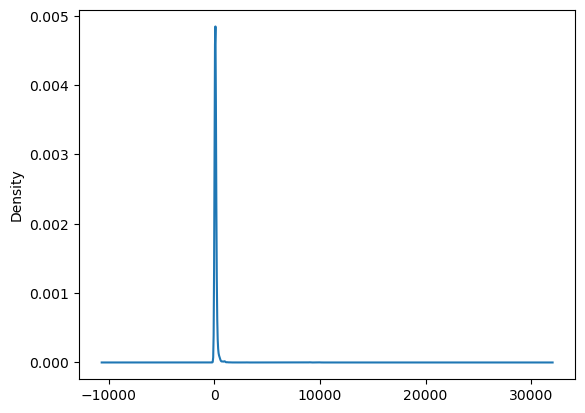

In [33]:
listings.price.plot.kde()

Review the maximums of price:

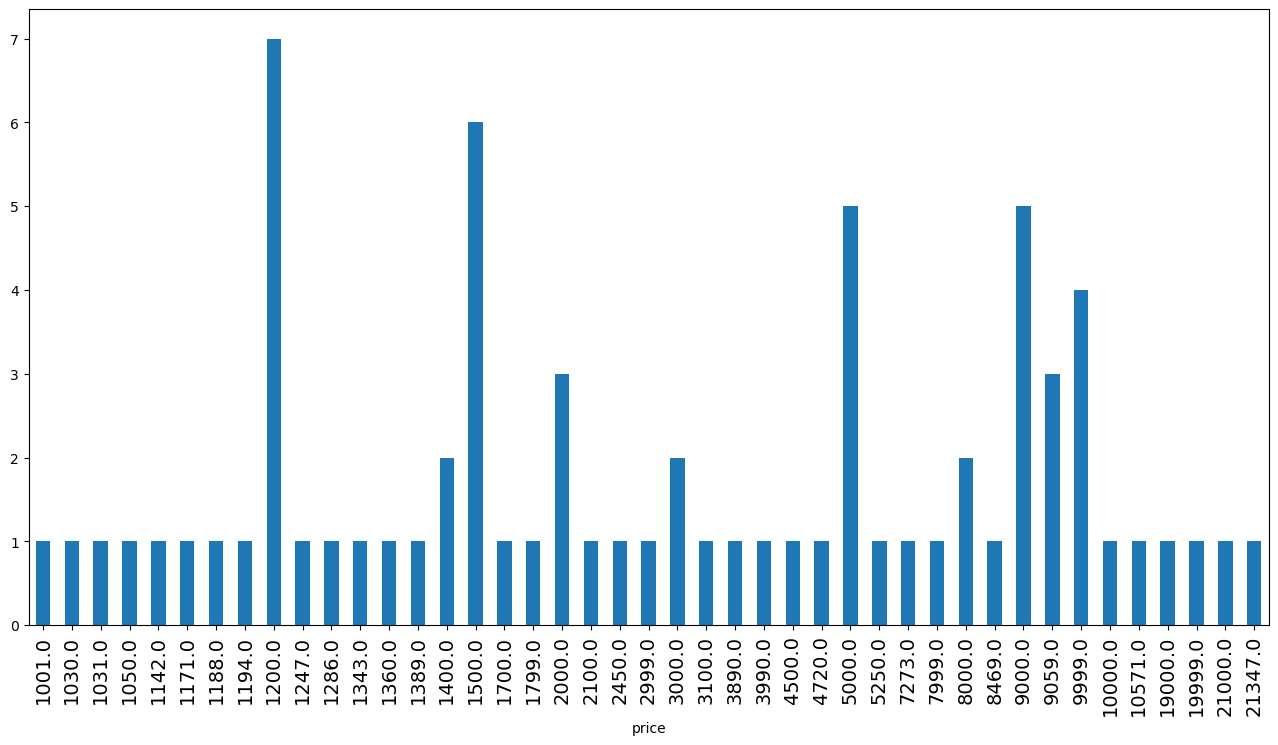

In [35]:
plt.figure(figsize=(16,8))
listings.price.loc[listings.price > 1000].value_counts().sort_index().plot.bar()
plt.xticks(size=14);

Review the minimums of price:

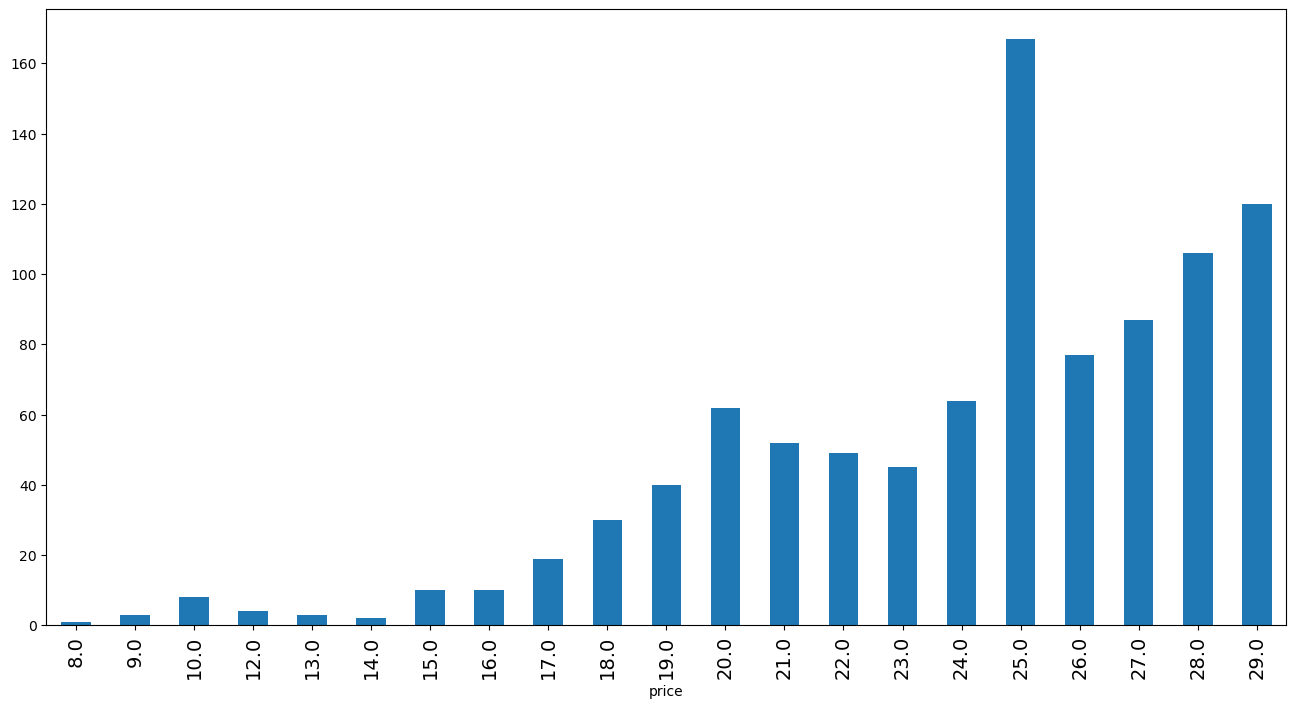

In [36]:
plt.figure(figsize=(16,8))
listings.price.loc[listings.price < 30].value_counts().sort_index().plot.bar()
plt.xticks(size=14);

Under 20$ per night is difficult to obtain profit. We delete this records:

In [37]:
listings = listings.loc[listings.price >= 20]
listings

,id,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,calculated_host_listings_count,availability_365
0,21853,Bright and airy room,83531,Latina,Cármenes,40.403810,-3.741300,Private room,31.0,4,2,144
4,62423,MAGIC ARTISTIC HOUSE IN THE CENTER OF MADRID,303845,Centro,Justicia,40.418840,-3.696550,Private room,69.0,1,3,332
6,70073,Adorable Apartment Malasaña-Gran Via,353738,Centro,Universidad,40.422520,-3.702500,Entire home/apt,80.0,28,4,273
7,70310,"Heart of Malasaña Cozy, Quiet & Sunny Apartment",353738,Centro,Universidad,40.422520,-3.702500,Entire home/apt,64.0,30,4,299
8,72150,Sunny attic duplex flat with terrace next to Sol,364585,Centro,Embajadores,40.411500,-3.704490,Entire home/apt,159.0,3,4,180
...,...,...,...,...,...,...,...,...,...,...,...,...
26755,1308816654087147793,Vive Madrid Río con Confort y Estilo,251333188,Latina,Puerta del Angel,40.413716,-3.724050,Entire home/apt,258.0,1,19,350
26756,1308818613904246041,Alquilo habitación por 15 días.,118339834,Centro,Palacio,40.413342,-3.709019,Private room,20.0,15,1,364
26757,1308839477505592914,Sierra Habitacion doble con Baño Privado,23441165,Puente de Vallecas,Numancia,40.399153,-3.663212,Private room,69.0,1,26,309
26758,1308842708819314249,Estudio luminoso y renovado junto a Madrid Río,251333188,Latina,Puerta del Angel,40.412371,-3.724235,Entire home/apt,258.0,1,19,348


## Table listings_det

In [38]:
listings_det.head()

,index,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,0,21853,https://www.airbnb.com/rooms/21853,20241212051353,2024-12-12,city scrape,Bright and airy room,We have a quiet and sunny room with a good vie...,We live in a leafy neighbourhood with plenty o...,https://a0.muscache.com/pictures/68483181/87bc...,...,4.82,4.21,4.67,None,f,2,0,2,0,0.27
1,1,30320,https://www.airbnb.com/rooms/30320,20241212051353,2024-12-12,previous scrape,Great Vacational Apartments,None,None,https://a0.muscache.com/pictures/336868/f67409...,...,4.78,4.90,4.69,None,f,3,3,0,0,0.98
2,2,30959,https://www.airbnb.com/rooms/30959,20241212051353,2024-12-12,previous scrape,Beautiful loft in Madrid Center,Beautiful Loft 60m2 size just in the historica...,None,https://a0.muscache.com/pictures/78173471/835e...,...,4.63,4.88,4.25,None,f,1,1,0,0,0.07
3,3,40916,https://www.airbnb.com/rooms/40916,20241212051353,2024-12-12,previous scrape,Holiday Apartment Madrid Center,None,None,https://a0.muscache.com/pictures/336736/c3b486...,...,4.79,4.88,4.55,None,f,3,3,0,0,0.29
4,4,62423,https://www.airbnb.com/rooms/62423,20241212051353,2024-12-12,city scrape,MAGIC ARTISTIC HOUSE IN THE CENTER OF MADRID,INCREDIBLE HOME OF AN ARTIST SURROUNDED BY PAI...,DISTRICT WITH VERY GOOD VIBES IN THE MIDDLE OF...,https://a0.muscache.com/pictures/miso/Hosting-...,...,4.85,4.97,4.58,None,f,3,1,2,0,2.73


In [39]:
listings_det.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26760 entries, 0 to 26759
Data columns (total 76 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   index                                         26760 non-null  int64  
 1   id                                            26760 non-null  int64  
 2   listing_url                                   26760 non-null  object 
 3   scrape_id                                     26760 non-null  int64  
 4   last_scraped                                  26760 non-null  object 
 5   source                                        26760 non-null  object 
 6   name                                          26760 non-null  object 
 7   description                                   25740 non-null  object 
 8   neighborhood_overview                         12228 non-null  object 
 9   picture_url                                   26759 non-null 

We pick the variables that they are important for our analysis:

In [41]:
to_maintain = ['id',
              'description',
              'host_is_superhost',
              'accommodates',
              'bathrooms',
              'bedrooms',
              'beds',
              'number_of_reviews',
              'review_scores_rating',
              'review_scores_communication',
              'review_scores_location'
             ]

listings_det = listings_det.loc[:,to_maintain]

listings_det.head()

,id,description,host_is_superhost,accommodates,bathrooms,bedrooms,beds,number_of_reviews,review_scores_rating,review_scores_communication,review_scores_location
0,21853,We have a quiet and sunny room with a good vie...,f,1,1.0,1.0,1.0,33,4.58,4.82,4.21
1,30320,None,f,2,NaN,1.0,NaN,172,4.63,4.78,4.90
2,30959,Beautiful Loft 60m2 size just in the historica...,f,2,NaN,1.0,NaN,8,4.38,4.63,4.88
3,40916,None,f,3,NaN,1.0,NaN,49,4.65,4.79,4.88
4,62423,INCREDIBLE HOME OF AN ARTIST SURROUNDED BY PAI...,f,4,1.5,1.0,2.0,219,4.64,4.85,4.97


In [42]:
listings_det.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26760 entries, 0 to 26759
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           26760 non-null  int64  
 1   description                  25740 non-null  object 
 2   host_is_superhost            25873 non-null  object 
 3   accommodates                 26760 non-null  int64  
 4   bathrooms                    20834 non-null  float64
 5   bedrooms                     24228 non-null  float64
 6   beds                         20828 non-null  float64
 7   number_of_reviews            26760 non-null  int64  
 8   review_scores_rating         21293 non-null  float64
 9   review_scores_communication  21293 non-null  float64
 10  review_scores_location       21290 non-null  float64
dtypes: float64(6), int64(3), object(2)
memory usage: 2.2+ MB


In [43]:
listings_det['host_is_superhost'] = listings_det['host_is_superhost'].astype('category')
    
listings_det.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26760 entries, 0 to 26759
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   id                           26760 non-null  int64   
 1   description                  25740 non-null  object  
 2   host_is_superhost            25873 non-null  category
 3   accommodates                 26760 non-null  int64   
 4   bathrooms                    20834 non-null  float64 
 5   bedrooms                     24228 non-null  float64 
 6   beds                         20828 non-null  float64 
 7   number_of_reviews            26760 non-null  int64   
 8   review_scores_rating         21293 non-null  float64 
 9   review_scores_communication  21293 non-null  float64 
 10  review_scores_location       21290 non-null  float64 
dtypes: category(1), float64(6), int64(3), object(1)
memory usage: 2.1+ MB


### Nulls

In [44]:
listings_det.isna().sum()

id                                0
description                    1020
host_is_superhost               887
accommodates                      0
bathrooms                      5926
bedrooms                       2532
beds                           5932
number_of_reviews                 0
review_scores_rating           5467
review_scores_communication    5467
review_scores_location         5470
dtype: int64

Conclusions:
- bathrooms is completely null, so we remove it.
- description: it's okay if it has null values, so we leave it.
- host_is_superhost has very few null values and is not a particularly relevant variable, so we leave it.
- beds: we can try to impute it based on accomodates.
- bedrooms is an important variable for us, so we can try to impute the null values using proxies such as accomodates or beds.

In [45]:
pd.crosstab(listings_det.beds, listings_det.accommodates)

accommodates,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
beds,,,,,,,,,,,,,,,,
0.0,74,169,32,88,16,17,2,6,1,1,0,2,0,0,0,0
1.0,2371,6006,413,698,23,31,2,2,0,2,0,4,0,0,0,0
2.0,112,906,1378,3211,121,129,7,7,1,2,0,1,1,0,0,0
3.0,23,83,191,1034,510,801,22,30,1,1,1,1,0,0,0,0
4.0,31,26,32,208,232,575,85,143,6,4,0,2,0,0,0,0
5.0,10,4,1,14,37,144,63,107,16,24,1,3,0,1,0,0
6.0,11,10,3,8,5,51,15,63,12,33,6,12,0,1,0,0
7.0,4,2,1,1,0,4,7,13,20,20,5,13,1,3,0,0
8.0,7,5,1,1,1,4,2,16,1,14,1,11,3,2,0,3


It seems that we could make a more or less direct assignment. Reading the matrix vertically, we see that:

* one or two people usually correspond to one bed
* three or four people usually correspond to two beds
* five or six people usually correspond to three beds
* for more than 6 people, we will assign four beds

In [46]:
listings_det['beds'].value_counts(dropna = False)

beds
1.0     9552
NaN     5932
2.0     5876
3.0     2698
4.0     1344
5.0      425
0.0      408
6.0      230
7.0       94
8.0       72
10.0      36
9.0       25
12.0      21
14.0      14
20.0       7
13.0       5
25.0       5
11.0       4
15.0       4
16.0       3
18.0       2
40.0       1
30.0       1
19.0       1
Name: count, dtype: int64

In [47]:
def imput_nulls(register):
    #Conditions
    conditions = [(register.accommodates <= 2),
               (register.accommodates > 2) & (register.accommodates <= 4),
               (register.accommodates > 4) & (register.accommodates <= 6),
               (register.accommodates > 6)]

    results = [1,2,3,4]
    
    return(np.select(conditions,results, default = -999))

In [49]:
listings_det.loc[listings_det.beds.isna(),'beds'] = listings_det.loc[listings_det.beds.isna()].apply(imput_nulls, axis = 1).astype('float64')
listings_det.beds.value_counts(dropna = False)

beds
1.0     13244
2.0      7409
3.0      3221
4.0      1528
5.0       425
0.0       408
6.0       230
7.0        94
8.0        72
10.0       36
9.0        25
12.0       21
14.0       14
20.0        7
13.0        5
25.0        5
11.0        4
15.0        4
16.0        3
18.0        2
40.0        1
30.0        1
19.0        1
Name: count, dtype: int64

In [50]:
pd.crosstab(listings_det.bedrooms, listings_det.accommodates)

accommodates,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
bedrooms,,,,,,,,,,,,,,,,
0.0,76,839,164,311,12,14,4,2,0,1,0,0,0,0,0,0
1.0,2710,7045,1626,3136,132,127,15,20,1,5,1,4,0,0,1,2
2.0,111,256,630,2571,609,1056,42,67,9,9,2,0,0,1,0,0
3.0,39,37,46,159,369,813,127,245,19,17,1,11,2,2,0,0
4.0,31,13,2,10,19,43,59,147,26,47,9,16,1,3,2,3
5.0,30,11,1,2,6,3,5,9,11,39,2,19,2,1,2,11
6.0,20,8,0,3,0,1,0,2,4,2,2,15,1,6,2,6
7.0,1,1,0,1,0,0,8,0,1,2,0,0,2,2,0,9
8.0,3,5,0,0,0,0,0,0,0,0,0,0,0,0,0,4


We can't see clearly the difference. We check againt the number of beds:

In [51]:
pd.crosstab(listings_det.bedrooms, listings_det.beds, dropna=False)

beds,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,13.0,14.0,15.0,16.0,18.0,19.0,20.0,25.0,30.0,40.0
bedrooms,,,,,,,,,,,,,,,,,,,,,
0.0,33,859,462,34,29,4,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1.0,284,9629,4118,506,168,22,26,9,22,0,...,0,0,1,0,1,0,7,0,1,1
2.0,60,277,2539,1783,565,96,35,5,3,0,...,0,0,0,0,0,0,0,0,0,0
3.0,21,53,94,857,556,201,63,22,12,5,...,0,0,0,0,0,0,0,0,0,0
4.0,4,27,2,17,175,75,66,36,14,7,...,0,0,0,0,0,0,0,0,0,0
5.0,1,35,0,4,19,26,17,13,15,9,...,2,1,0,0,0,0,0,0,0,0
6.0,3,25,1,0,3,0,14,4,5,3,...,2,8,0,1,0,0,0,0,0,0
7.0,0,2,2,0,7,0,1,5,1,0,...,1,2,2,1,1,0,0,0,0,0
8.0,0,6,2,0,0,0,0,0,0,1,...,0,1,0,1,0,0,0,0,0,0


Here we could make a more direct assignment. Reading the matrix vertically, we see that:

* zero, one, or two beds usually corresponds to one room
* three or four beds usually corresponds to two rooms
* five or six beds usually corresponds to three rooms
* for more beds, we will assign four rooms

In [52]:
listings_det.bedrooms.value_counts(dropna = False)

bedrooms
1.0     14825
2.0      5363
NaN      2532
3.0      1887
0.0      1423
4.0       431
5.0       154
6.0        72
7.0        27
8.0        12
9.0         8
10.0        7
18.0        6
14.0        4
11.0        4
12.0        2
13.0        1
15.0        1
25.0        1
Name: count, dtype: int64

In [54]:
def imput_nulls(register):
    #Conditions
    conditions = [(register.beds <= 2),
               (register.beds > 2) & (register.beds <= 4),
               (register.beds > 4) & (register.beds <= 6),
               (register.beds > 6)]

    results = [1,2,3,4]
    
    return(np.select(conditions,results, default = -999))

In [56]:
listings_det.loc[listings_det.bedrooms.isna(),'bedrooms'] = listings_det.loc[listings_det.bedrooms.isna()].apply(imput_nulls, axis = 1).astype('float64')
listings_det.bedrooms.value_counts(dropna = False)

bedrooms
1.0     17326
2.0      5387
3.0      1894
0.0      1423
4.0       431
5.0       154
6.0        72
7.0        27
8.0        12
9.0         8
10.0        7
18.0        6
14.0        4
11.0        4
12.0        2
25.0        1
15.0        1
13.0        1
Name: count, dtype: int64

In [57]:
listings_det.drop(columns = 'bathrooms', inplace = True)
listings_det.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26760 entries, 0 to 26759
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   id                           26760 non-null  int64   
 1   description                  25740 non-null  object  
 2   host_is_superhost            25873 non-null  category
 3   accommodates                 26760 non-null  int64   
 4   bedrooms                     26760 non-null  float64 
 5   beds                         26760 non-null  float64 
 6   number_of_reviews            26760 non-null  int64   
 7   review_scores_rating         21293 non-null  float64 
 8   review_scores_communication  21293 non-null  float64 
 9   review_scores_location       21290 non-null  float64 
dtypes: category(1), float64(5), int64(3), object(1)
memory usage: 1.9+ MB


### Duplicates

In [58]:
listings_det.duplicated().sum()

0

### Category variables

In [59]:
listings_det.host_is_superhost.value_counts()

host_is_superhost
f    19385
t     6488
Name: count, dtype: int64

### Numeric variables

In [60]:
listings_det.describe(include=  'number').T

,count,mean,std,min,25%,50%,75%,max
id,26760.0,6.092656e+17,5.191434e+17,21853.0,35512285.00,7.710720e+17,1.104581e+18,1.309432e+18
accommodates,26760.0,3.129858e+00,1.898148e+00,1.0,2.00,2.000000e+00,4.000000e+00,1.600000e+01
bedrooms,26760.0,1.398356e+00,9.644359e-01,0.0,1.00,1.000000e+00,2.000000e+00,2.500000e+01
beds,26760.0,1.876532e+00,1.420937e+00,0.0,1.00,1.000000e+00,2.000000e+00,4.000000e+01
number_of_reviews,26760.0,4.698378e+01,8.718835e+01,0.0,1.00,1.100000e+01,5.200000e+01,1.136000e+03
review_scores_rating,21293.0,4.656892e+00,4.661729e-01,1.0,4.56,4.770000e+00,4.930000e+00,5.000000e+00
review_scores_communication,21293.0,4.759805e+00,4.510036e-01,1.0,4.73,4.890000e+00,5.000000e+00,5.000000e+00
review_scores_location,21290.0,4.750501e+00,3.753460e-01,1.0,4.67,4.870000e+00,4.980000e+00,5.000000e+00


# Analytic Datamart

Two main tables:
- listings
- listings_det

We can join the tables with the column id. The main table is listings.
we also have the table price_m2, we join this table with neighbourhood_group.

In [61]:
listings.shape

(20634, 12)

In [62]:
listings_det.shape

(26760, 10)

In [65]:
df = pd.merge(left= listings, right= listings_det,
              how= 'left', on= 'id')
df

,id,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,...,availability_365,description,host_is_superhost,accommodates,bedrooms,beds,number_of_reviews,review_scores_rating,review_scores_communication,review_scores_location
0,21853,Bright and airy room,83531,Latina,Cármenes,40.403810,-3.741300,Private room,31.0,4,...,144,We have a quiet and sunny room with a good vie...,f,1,1.0,1.0,33,4.58,4.82,4.21
1,62423,MAGIC ARTISTIC HOUSE IN THE CENTER OF MADRID,303845,Centro,Justicia,40.418840,-3.696550,Private room,69.0,1,...,332,INCREDIBLE HOME OF AN ARTIST SURROUNDED BY PAI...,f,4,1.0,2.0,219,4.64,4.85,4.97
2,70073,Adorable Apartment Malasaña-Gran Via,353738,Centro,Universidad,40.422520,-3.702500,Entire home/apt,80.0,28,...,273,Beautiful apartment with spacious living room ...,f,2,1.0,1.0,35,4.21,4.38,4.59
3,70310,"Heart of Malasaña Cozy, Quiet & Sunny Apartment",353738,Centro,Universidad,40.422520,-3.702500,Entire home/apt,64.0,30,...,299,Cozy Apartment in great location in the center...,f,2,1.0,2.0,29,4.36,4.69,4.86
4,72150,Sunny attic duplex flat with terrace next to Sol,364585,Centro,Embajadores,40.411500,-3.704490,Entire home/apt,159.0,3,...,180,"Nestled in the serene heart of Madrid, this re...",t,6,3.0,5.0,121,4.61,4.84,4.84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20629,1308816654087147793,Vive Madrid Río con Confort y Estilo,251333188,Latina,Puerta del Angel,40.413716,-3.724050,Entire home/apt,258.0,1,...,350,Escape to the heart of Madrid with our cozy lo...,NaN,4,1.0,2.0,0,NaN,NaN,NaN
20630,1308818613904246041,Alquilo habitación por 15 días.,118339834,Centro,Palacio,40.413342,-3.709019,Private room,20.0,15,...,364,"Hi! I'm Monica, I live with my kitten, I rent ...",f,1,1.0,1.0,0,NaN,NaN,NaN
20631,1308839477505592914,Sierra Habitacion doble con Baño Privado,23441165,Puente de Vallecas,Numancia,40.399153,-3.663212,Private room,69.0,1,...,309,Tour the most popular shops and restaurants fr...,f,2,1.0,1.0,0,NaN,NaN,NaN
20632,1308842708819314249,Estudio luminoso y renovado junto a Madrid Río,251333188,Latina,Puerta del Angel,40.412371,-3.724235,Entire home/apt,258.0,1,...,348,"Renovated, cozy and warm studio located in the...",NaN,2,1.0,2.0,0,NaN,NaN,NaN


Check if the values of neighbourhood_group are the same in df and price_m2:

In [66]:
distrits1 = pd.Series(df.neighbourhood_group.unique().categories).sort_values()
distrits1

0                Arganzuela
1                   Barajas
2               Carabanchel
3                    Centro
4                 Chamartín
5                  Chamberí
6             Ciudad Lineal
7     Fuencarral - El Pardo
8                 Hortaleza
9                    Latina
10        Moncloa - Aravaca
11                Moratalaz
12       Puente de Vallecas
13                   Retiro
14                Salamanca
15    San Blas - Canillejas
16                   Tetuán
17                    Usera
18                Vicálvaro
19        Villa de Vallecas
20               Villaverde
dtype: object

In [68]:
distrits2 = price_m2.distrito
distrits2

1             Arganzuela
2                Barajas
3            Carabanchel
4                 Centro
5              Chamartín
6               Chamberí
7          Ciudad Lineal
8             Fuencarral
9              Hortaleza
10                Latina
11               Moncloa
12             Moratalaz
13    Puente de Vallecas
14                Retiro
15             Salamanca
16              San Blas
17                Tetuán
18                 Usera
19             Vicálvaro
20     Villa de Vallecas
21            Villaverde
Name: distrito, dtype: object

Three are diffentent values:
* Fuencarral - El Pardo
* Moncloa - Aravaca
* San Blas - Canillejas

In [69]:
price_m2.distrito = price_m2.distrito.map({'Fuencarral':'Fuencarral - El Pardo',
                        'Moncloa':'Moncloa - Aravaca',
                        'San Blas':'San Blas - Canillejas'}) \
                    .fillna(price_m2.distrito)

price_m2

,precio_m2,distrito
1,5247,Arganzuela
2,3817,Barajas
3,2904,Carabanchel
4,6739,Centro
5,6642,Chamartín
6,7394,Chamberí
7,4001,Ciudad Lineal
8,4351,Fuencarral - El Pardo
9,4564,Hortaleza
10,3116,Latina


In [70]:
df = pd.merge(left = df, right = price_m2, how = 'left', left_on='neighbourhood_group', right_on='distrito')
df

,id,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,...,host_is_superhost,accommodates,bedrooms,beds,number_of_reviews,review_scores_rating,review_scores_communication,review_scores_location,precio_m2,distrito
0,21853,Bright and airy room,83531,Latina,Cármenes,40.403810,-3.741300,Private room,31.0,4,...,f,1,1.0,1.0,33,4.58,4.82,4.21,3116,Latina
1,62423,MAGIC ARTISTIC HOUSE IN THE CENTER OF MADRID,303845,Centro,Justicia,40.418840,-3.696550,Private room,69.0,1,...,f,4,1.0,2.0,219,4.64,4.85,4.97,6739,Centro
2,70073,Adorable Apartment Malasaña-Gran Via,353738,Centro,Universidad,40.422520,-3.702500,Entire home/apt,80.0,28,...,f,2,1.0,1.0,35,4.21,4.38,4.59,6739,Centro
3,70310,"Heart of Malasaña Cozy, Quiet & Sunny Apartment",353738,Centro,Universidad,40.422520,-3.702500,Entire home/apt,64.0,30,...,f,2,1.0,2.0,29,4.36,4.69,4.86,6739,Centro
4,72150,Sunny attic duplex flat with terrace next to Sol,364585,Centro,Embajadores,40.411500,-3.704490,Entire home/apt,159.0,3,...,t,6,3.0,5.0,121,4.61,4.84,4.84,6739,Centro
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20629,1308816654087147793,Vive Madrid Río con Confort y Estilo,251333188,Latina,Puerta del Angel,40.413716,-3.724050,Entire home/apt,258.0,1,...,NaN,4,1.0,2.0,0,NaN,NaN,NaN,3116,Latina
20630,1308818613904246041,Alquilo habitación por 15 días.,118339834,Centro,Palacio,40.413342,-3.709019,Private room,20.0,15,...,f,1,1.0,1.0,0,NaN,NaN,NaN,6739,Centro
20631,1308839477505592914,Sierra Habitacion doble con Baño Privado,23441165,Puente de Vallecas,Numancia,40.399153,-3.663212,Private room,69.0,1,...,f,2,1.0,1.0,0,NaN,NaN,NaN,2591,Puente de Vallecas
20632,1308842708819314249,Estudio luminoso y renovado junto a Madrid Río,251333188,Latina,Puerta del Angel,40.412371,-3.724235,Entire home/apt,258.0,1,...,NaN,2,1.0,2.0,0,NaN,NaN,NaN,3116,Latina


Check if any nulls were generated:

In [71]:
df.precio_m2.isna().sum()

0

# Save df in BBDD

In [72]:
df.to_sql('df', con = con, if_exists = 'replace')

20634